# TMDb Movies Project

## Context

Want to make a movie with highest profits and hits? You have come to right place! Also we are going to find other interesting stuffs about movies that our data is telling us.

## Inspiration

What questions are answered?

    Which movies have the highest and least- budget, revenues, profits and runtime. And in which year we had most movies making profits?
    What are the similar characteristics does the most profitable movies have?


In [115]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()
movies = pd.read_csv('tmdb_movies_data.csv')
print(movies.shape)
movies.describe()

(10866, 21)


,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


In [116]:
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/2015,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/2015,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/2015,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/2015,2947,7.3,2015,174799923.1,1.385749e+09


## Cleanning

In [117]:
movies.duplicated().sum()

1

In [118]:
# Drop the duplicate roows and store the results in the movies variable (inplace=True)
movies.drop_duplicates(inplace=True)
movies.duplicated().sum()

0

### Null or 0 value


In [119]:
movies.isna().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7929
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

One of the simple solution for null or na value, is to delete columns not useful for our study

In [120]:
movies.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [121]:
delete_columns = ['id', 'imdb_id', 'budget', 'revenue', 
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'production_companies', 'release_date']

# cast maybe can help in our study, celebrity cast may can increase the popularite and revenue
movies.drop(delete_columns, axis=1, inplace=True)
movies.head()

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09


In [122]:
movies.isna().sum()

popularity         0
original_title     0
genres            23
vote_count         0
vote_average       0
release_year       0
budget_adj         0
revenue_adj        0
dtype: int64

In [123]:
# i can just drop the rows
print(23/len(movies['genres']))
movies.dropna(inplace=True)

print(movies.shape)
movies.isna().sum()

0.002116889093419236
(10842, 8)


popularity        0
original_title    0
genres            0
vote_count        0
vote_average      0
release_year      0
budget_adj        0
revenue_adj       0
dtype: int64

### recodage du colonne genre

j'ai  décider de garder juste la première valeur du genre

In [124]:
# Première méthode de l 'auteur'
list_genres = []
for i in movies['genres']:
    i = i.split('|')
    list_genres.append(i[0])
    
movies['genres_adj'] = list_genres

In [125]:
# Ma méthode
def func(genre):
    return genre.split('|')[0]

movies['genres_adj'] = movies['genres'].apply(func)
movies.head()

,popularity,original_title,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,genres_adj
0,32.985763,Jurassic World,Action|Adventure|Science Fiction|Thriller,5562,6.5,2015,137999939.3,1.392446e+09,Action
1,28.419936,Mad Max: Fury Road,Action|Adventure|Science Fiction|Thriller,6185,7.1,2015,137999939.3,3.481613e+08,Action
2,13.112507,Insurgent,Adventure|Science Fiction|Thriller,2480,6.3,2015,101199955.5,2.716190e+08,Adventure
3,11.173104,Star Wars: The Force Awakens,Action|Adventure|Science Fiction|Fantasy,5292,7.5,2015,183999919.0,1.902723e+09,Action
4,9.335014,Furious 7,Action|Crime|Thriller,2947,7.3,2015,174799923.1,1.385749e+09,Action


## Analyse exploratoire

etudier variable par variable

#### Analyse univarier

In [126]:
print("Popularity mean : ", movies['popularity'].mean())
print("Vote count mean : ", movies['vote_count'].mean())
print("Vote average mean : ", movies['vote_average'].mean())
print("Budget mean : ", movies['budget_adj'].mean())
print("Revenue mean : ", movies['revenue_adj'].mean())

Popularity mean :  0.6474605913115661
Vote count mean :  217.82364877328905
Vote average mean :  5.974063825862405
Budget mean :  17587121.438276574
Revenue mean :  51477974.92242094


In [127]:
movies['genres_adj'].unique()

array(['Action', 'Adventure', 'Western', 'Science Fiction', 'Drama',
       'Family', 'Comedy', 'Crime', 'Romance', 'War', 'Mystery',
       'Thriller', 'Fantasy', 'History', 'Animation', 'Horror', 'Music',
       'Documentary', 'TV Movie', 'Foreign'], dtype=object)

In [128]:
movies['genres_adj'].value_counts()

Drama              2453
Comedy             2319
Action             1590
Horror              915
Adventure           586
Thriller            491
Documentary         432
Animation           403
Crime               380
Fantasy             272
Science Fiction     214
Romance             186
Family              144
Mystery             125
Music               100
TV Movie             78
War                  59
History              44
Western              42
Foreign               9
Name: genres_adj, dtype: int64

#### Voir la destrubition des variables

In [129]:
def hist(col, x_label, y_label):
    n_data = len(col)
    n_bins = int(np.sqrt(n_data))

    _= plt.hist(col, bins=n_bins)
    _= plt.xlabel(x_label)
    _= plt.ylabel(y_label)
    _= plt.show()

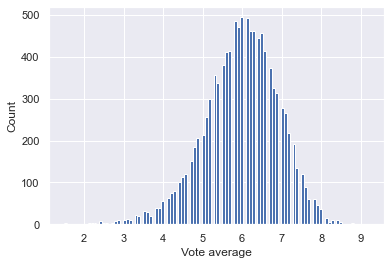

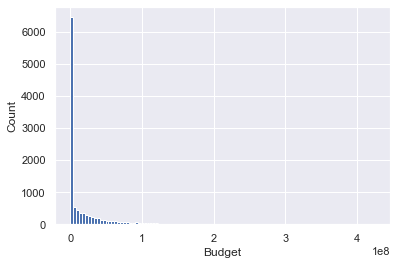

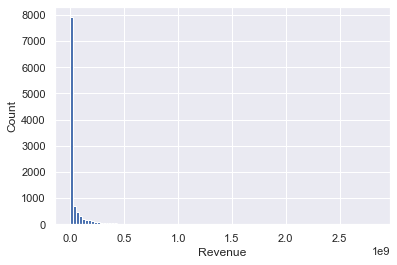

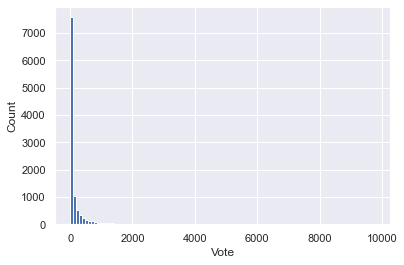

In [130]:
#movies['vote_average'].plot(kind='hist')
# envoie ici que les votes son alenteur du 6 on pourrer ajuster bins = sqrt(len(movies['vote_average']))
hist(movies['vote_average'], 'Vote average', 'Count')

hist(movies['budget_adj'], 'Budget', 'Count')
# ici envoie qu'il ya un grand ecart entre la valeur maximal et les autres valeurs, pas intérissant

hist(movies['revenue_adj'], 'Revenue', 'Count')

hist(movies['vote_count'], 'Vote', 'Count')

### On aimrait savoir quels films(leurs caractéristiques) qui ont cette valeur maximal ???

#### analyse bivarier

AVec la matrice de corrélation

<AxesSubplot:>

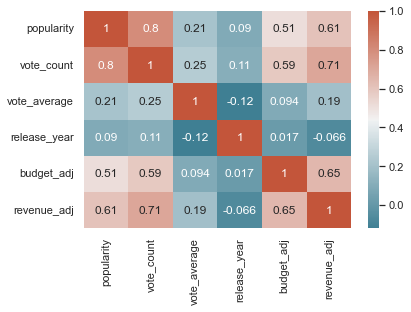

In [131]:
corr = movies.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))

Donc on peut déduire pour la variable revenue_adj:

    avec la variable budget_adj(0.65) la correlation est forte
    avec la variable vote_count(0.71) la correlation est forte
    acec la variable popularity(0.61) la correlation est forte
    
Donc ce sont les trois variables qui impactent le revenue

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='budget_adj', ylabel='revenue_adj'>

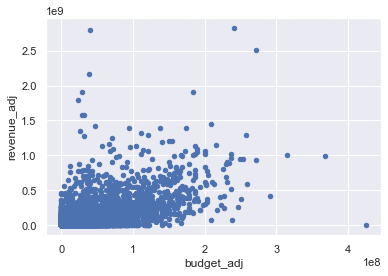

In [132]:
movies.plot(x='budget_adj', y='revenue_adj', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='vote_count', ylabel='revenue_adj'>

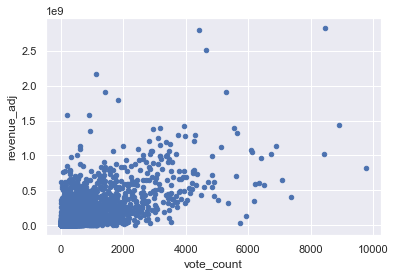

In [133]:
movies.plot(x='vote_count', y='revenue_adj', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='vote_average', ylabel='revenue_adj'>

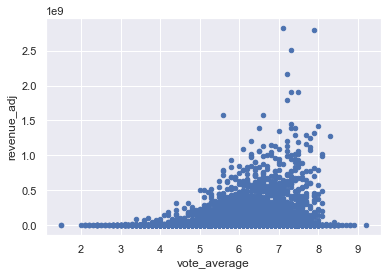

In [134]:
movies.plot(x='vote_average', y='revenue_adj', kind='scatter')

On peut dir que les votes qui sont entre 5 et 8 on un revenue elevé

Q1 : Quel est le genre de filme qui a le plus de revenue ?

In [137]:
df_genre_rev = movies.groupby('genres_adj')['revenue_adj'].mean()
df_genre_rev

genres_adj
Action             7.401006e+07
Adventure          1.665356e+08
Animation          7.671443e+07
Comedy             3.837766e+07
Crime              4.686688e+07
Documentary        2.150125e+06
Drama              3.578622e+07
Family             7.724863e+07
Fantasy            8.283760e+07
Foreign            0.000000e+00
History            6.536195e+07
Horror             2.417979e+07
Music              3.807907e+07
Mystery            3.002289e+07
Romance            4.721514e+07
Science Fiction    9.951810e+07
TV Movie           7.485782e+05
Thriller           3.096924e+07
War                4.874310e+07
Western            4.730739e+07
Name: revenue_adj, dtype: float64

<AxesSubplot:xlabel='genres_adj'>

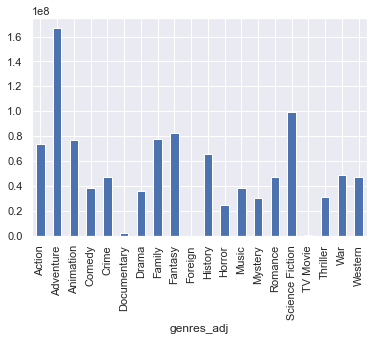

In [138]:
df_genre_rev.plot(kind='bar')

<AxesSubplot:xlabel='genres_adj'>

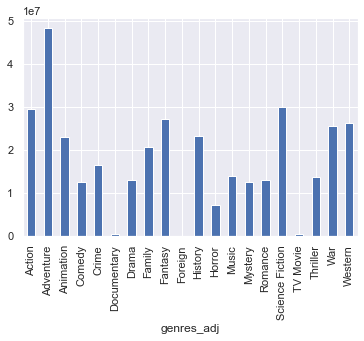

In [139]:
df_budget_rev = movies.groupby('genres_adj')['budget_adj'].mean()
df_budget_rev.plot(kind='bar')

Q2 : les caractéristiques des filmes avec un très bon revenues ?

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='budget_adj', ylabel='revenue_adj'>

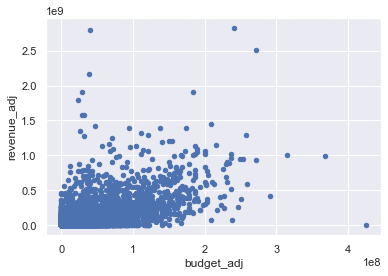

In [140]:
movies.plot(x='budget_adj', y='revenue_adj', kind='scatter')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='vote_count', ylabel='revenue_adj'>

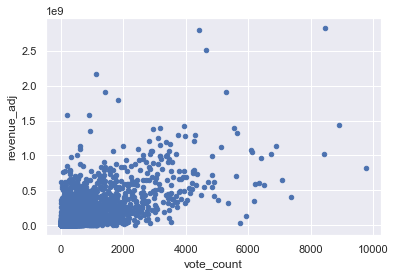

In [141]:
movies.plot(x='vote_count', y='revenue_adj', kind='scatter')